In [64]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
length = 10 
width = 8

board = np.zeros((4, length, width))

In [3]:
board[1][2][3] = 2

In [4]:
board[1][2][3]

2.0

In [5]:
board[(1,2,3)] = 4

In [6]:
board[1,2,3]

4.0

In [7]:
# board

In [9]:
import sys
sys.path.append("/home/mizworski/PycharmProjects/PaperSoccerRL/")
from soccer.board import Board

In [10]:
b = Board() 

In [11]:
b.print_board()

[[[ 1.  1.  1.  1.  0.  1.  1.  1.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 1.  1.  1.  0.  0.  1.  1.  1.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]

 [[ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  

In [12]:
board[1,2]

array([ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.])

In [13]:
fp = open('../data/sc.txt') # open file on read mode
lines = fp.read().split("\n") # create a list containing all lines
fp.close() # close file

In [25]:
count = 0
for line in lines:
    if line == '[Site "kurnik"]':
        count += 1

In [26]:
count

646808

In [21]:
lines[:16]

['[Event "?"]',
 '[Site "kurnik"]',
 '[Date "2017.06.05"]',
 '[Round "-"]',
 '[Black "cukierekzkwasem"]',
 '[White "pfc7935g"]',
 '[Result "0-1"]',
 '[Time "15:05:39"]',
 '[TimeControl "120"]',
 '[BlackElo "1440"]',
 '[WhiteElo "1475"]',
 '',
 '1. 0 1 2. 4 1 3. 63 01 4. 35 77 5. 46 3605 6. 25 0312225 7. 75 77 8. 47 0 9.',
 '364 325 10. 05 22 11. 5 2 12. 7474 4 13. 5 2 14. 30 65031713 15. 50',
 '502724101643 16. 5024 1 17. 3 4 18. 1616 170364 19. 5206 0 20. 7435201610 16174',
 '21. 4460 6560 22. 30 667 23. 53 25 24. 53 317 25. 1644616 461724160 0-1']

In [23]:
games = []
game = ''
parsing_game = False
for line in lines:
    if line == '' and game != '':
        games.append(game)
        game = ''
    elif not line.startswith('['):
        game += line

In [24]:
len(games)

646808

In [28]:
games_history = []
for game in games:
    history = []
    for seq in game.split()[:-1]:
        if '.' not in seq:
            history.append(seq)
            
    games_history.append(history)

In [30]:
len(games_history)

646808

In [31]:
longest_game = 0
longest_path = 0

lgid = 0
lpid = 0

i = 0
for hist in games_history:
    if longest_game < len(hist):
        longest_game = len(hist)
        lgid = i
    
    count = 0
    for el in history:
        count += len(el)
    
    if longest_path < count:
        longest_path = count
        lpid = i
        
    i += 1
        

In [32]:
longest_game

62

In [33]:
longest_path

65

In [34]:
# only games with at least 1 round
games_history_new = list(filter(lambda hist: len(hist) > 0, games_history))

In [35]:
# rounds per game
sum(list(map(len, games_history_new))) / len(games_history_new)

34.13738787332227

In [38]:
empty_games = 0
for history in games_history:
    if history == []:
        empty_games += 1
        
empty_games

2559

In [44]:
# path length per move
average_move_length = list(map(lambda hist: sum(list(map(len, hist))) / len(hist), games_history_new))

sum(average_move_length) / len(average_move_length)

2.55856437713069

In [43]:
# path length per game
average_game_path_len = list(map(lambda hist: sum(list(map(len, hist))), games_history_new))

sum(average_game_path_len) / len(average_game_path_len)

94.04819875545014

In [54]:
# count = 0
# for line in lines:
#     if 'Elo' in line:
#         elo = re.findall('"([^"]*)"', line)[0]
#         print(int(elo))
        
elos = list(map(lambda line: int(re.findall('"([^"]*)"', line)[0]),filter(lambda line: 'Elo' in line, lines)))

In [58]:
elos_series = pd.Series(elos)

In [138]:
ranges = [0, 1150, 1250,1400, 1650, 3100]
elos_ranges = elos_series.groupby(pd.cut(elos_series, ranges)).count()

In [139]:
elos_ranges

(0, 1150]        87553
(1150, 1250]    439243
(1250, 1400]    356364
(1400, 1650]    293897
(1650, 3100]    116559
dtype: int64

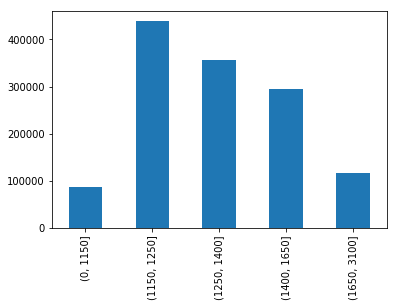

In [140]:
elos_ranges.plot.bar()
plt.show()

In [120]:
from skimage.io import imread, imshow

In [115]:
img = imread('/home/mizworski/Documents/PrzeszłeZajęcia/SIK-projekt/10568966_707962132573956_5087509836809801898_n.jpg')

In [123]:
img.shape

(720, 960, 3)

In [124]:
x = np.arange(16.0).reshape(2, 2, 4)

In [125]:
x.shape

(2, 2, 4)

In [131]:
np.dsplit(x, 4)

[array([[[  0.],
         [  4.]],
 
        [[  8.],
         [ 12.]]]), array([[[  1.],
         [  5.]],
 
        [[  9.],
         [ 13.]]]), array([[[  2.],
         [  6.]],
 
        [[ 10.],
         [ 14.]]]), array([[[  3.],
         [  7.]],
 
        [[ 11.],
         [ 15.]]])]

In [132]:
len(np.dsplit(x, 4))

4

In [135]:
np.dsplit(x, 4)[1].reshape((2,2))

array([[  1.,   5.],
       [  9.,  13.]])

In [137]:
games_history_new

[['0',
  '1',
  '4',
  '1',
  '63',
  '01',
  '35',
  '77',
  '46',
  '3605',
  '25',
  '0312225',
  '75',
  '77',
  '47',
  '0',
  '325',
  '05',
  '22',
  '5',
  '2',
  '7474',
  '4',
  '5',
  '2',
  '30',
  '65031713',
  '50502724101643',
  '5024',
  '1',
  '3',
  '4',
  '1616',
  '170364',
  '5206',
  '0',
  '7435201610',
  '4460',
  '6560',
  '30',
  '667',
  '53',
  '25',
  '53',
  '317',
  '1644616',
  '461724160'],
 ['4',
  '7',
  '25',
  '01',
  '47',
  '21',
  '6',
  '57',
  '2',
  '445',
  '27',
  '44',
  '14',
  '11',
  '775',
  '42701',
  '3147',
  '22',
  '2',
  '35',
  '35',
  '35',
  '7',
  '5',
  '5',
  '31',
  '76',
  '1',
  '217',
  '661',
  '60303',
  '46101',
  '036365617',
  '5647',
  '6',
  '61',
  '34753',
  '225753',
  '233457',
  '572',
  '713530',
  '12',
  '30672445',
  '706',
  '32',
  '11',
  '47214',
  '7430225',
  '4357125',
  '17'],
 ['5', '4', '5'],
 ['3'],
 ['1',
  '7',
  '2',
  '44',
  '7',
  '45',
  '7',
  '4',
  '20',
  '53',
  '02',
  '53',
  '0',

In [ ]:
''

In [148]:
arr = np.array([[1,2], [3, 4], [5, 6]])

In [152]:
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [153]:
arr.shape

(3, 2)

In [151]:
arr.flatten()

array([1, 2, 3, 4, 5, 6])

In [157]:
arr.flatten().reshape((2, 3)).reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [167]:
df = pd.DataFrame([arr.flatten()])
df2 = pd.DataFrame([arr.flatten()])

In [172]:
df.append(df2, ignore_index=True)

,0,1,2,3,4,5
0,1,2,3,4,5,6
1,1,2,3,4,5,6


In [173]:
df3 = pd.DataFrame()

In [174]:
df3.append(df.append(df2))

,0,1,2,3,4,5
0,1,2,3,4,5,6
0,1,2,3,4,5,6
